<a href="https://colab.research.google.com/github/ldabas/QuantumResearch/blob/master/Wastewater_data_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install xgboost
import numpy as np
import xgboost
print("xgboost", xgboost.__version__)

xgboost 0.90


In [ ]:
# Works if Dataset.xlsx is uploaded directly on filesys on left
with pd.ExcelFile('./Dataset.xlsx') as reader:
    # Train from data
    sheet1 = pd.read_excel(reader, sheet_name='SS(Ave)')[['Date','BOD','NH3-N','TN', 'PH']]
    sheet3 = pd.read_excel(reader, sheet_name='AT(Ave)')[['Date','MLSS', 'AT_Temp']]
    # test data
    sheet2 = pd.read_excel(reader, sheet_name='FE')[['Date', 'BOD', 'NH3-N','TN']]
    

# Make Date the index
sheet1.set_index('Date', inplace=True)
sheet2.set_index('Date', inplace=True)
sheet3.set_index('Date', inplace=True)

df_inputs = pd.merge(sheet1, sheet3, on='Date', how='outer')
df_outputs = sheet2

df_inputs

,BOD,NH3-N,TN,PH,MLSS,AT_Temp
Date,,,,,,
2013-01-01,NaN,25.0,NaN,7.4,NaN,21.350
2013-01-02,NaN,NaN,NaN,NaN,2540.0,21.850
2013-01-03,120.0,31.0,45.0,8.1,NaN,22.400
2013-01-04,NaN,NaN,NaN,NaN,2230.0,21.975
2013-01-05,NaN,NaN,NaN,NaN,NaN,21.100
...,...,...,...,...,...,...
2018-12-27,120.0,31.0,56.0,7.3,3430.0,23.150
2018-12-28,NaN,NaN,NaN,NaN,3330.0,21.925
2018-12-29,NaN,NaN,NaN,NaN,NaN,21.075


In [ ]:
# impute values using 5 nearest rows in KNN
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler, IterativeImputer

df_inputs = pd.DataFrame(data=IterativeImputer().fit_transform(df_inputs), columns=df_inputs.columns, index=df_inputs.index)
df_outputs = pd.DataFrame(data=IterativeImputer().fit_transform(df_outputs), columns=df_outputs.columns, index=df_outputs.index)
df_inputs.describe()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0

,BOD,NH3-N,TN,PH,MLSS,AT_Temp
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,157.046277,25.792723,44.709221,7.235137,2616.551967,26.857097
std,22.085408,4.756808,7.179065,0.181869,482.260177,3.379262
min,38.000000,12.000000,25.000000,6.600000,1320.000000,17.900000
25%,148.201501,23.433560,40.945748,7.141022,2320.000000,23.900000
50%,155.977370,26.000000,43.838399,7.200000,2540.000000,27.675000
75%,162.394213,28.000000,47.793942,7.300000,2836.485685,29.775000
max,500.000000,48.000000,106.000000,8.600000,6071.240875,41.766667


In [ ]:
"""
Inputs: BOD, NH3-N, and TN from SS(average), temperature and pH (including influent and AS tank), and MLSS (AS tank)
Outputs: BOD, ammonia, and TN from FE (average).
"""
df_outputs.describe()

,BOD,NH3-N,TN
count,2191.000000,2191.000000,2191.000000
mean,5.182697,0.539631,8.554469
std,0.710022,0.123298,1.085123
min,5.000000,0.500000,2.700000
25%,5.000000,0.500000,8.532334
50%,5.171932,0.500000,8.554469
75%,5.182697,0.539631,8.554469
max,29.000000,2.900000,16.000000


LR: -0.024455 (0.052866)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

NN: -5.008253 (6.536443)
KNN: -0.357823 (0.287340)
RF: -0.419826 (0.466452)
SVR: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (153, 3)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (302, 3)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (451, 3)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

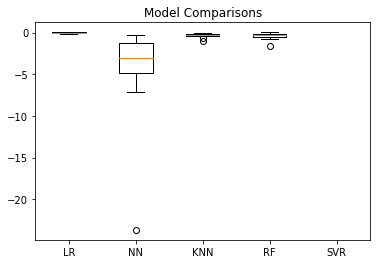

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Get all the models we want to use
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=0.25, random_state=42)

# Evaluate each model in turn (forward chaining)
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Models
plt.boxplot(results, labels=names)
plt.title('Model Comparisons')
plt.show()

In [ ]:
from sklearn.metrics import make_scorer

def rmse(actual, predict):
  predict = np.array(predict)
  actual = np.array(actual)
  distance = predict - actual
  square_distance = distance ** 2
  mean_square_distance = square_distance.mean()
  score = np.sqrt(mean_square_distance)
  return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB


model1 = LinearRegression()
model2 = MLPRegressor(solver = 'lbfgs')  #neural network
model3 = KNeighborsRegressor()
model4 = RandomForestRegressor(n_estimators = 3) # Ensemble method - collection of many decision trees
model5 = SVR(gamma='auto') # kernel = linear

def regression_results(y_true, y_pred):
  # Regression metrics
  explained_variance=metrics.explained_variance_score(y_true, y_pred)
  mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
  mse=metrics.mean_squared_error(y_true, y_pred) 
  mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
  median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
  r2=metrics.r2_score(y_true, y_pred)
  print('explained_variance: ', round(explained_variance,4))    
  print('mean_squared_log_error: ', round(mean_squared_log_error,4))
  print('r2: ', round(r2,4))
  print('MAE: ', round(mean_absolute_error,4))
  print('MSE: ', round(mse,4))
  print('RMSE: ', round(np.sqrt(mse),4))

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_true = y_test.values
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

print(rmse(y_pred1, y_true))
print(rmse(y_pred2, y_true))
print(rmse(y_pred3, y_true))
print(rmse(y_pred4, y_true))

In [ ]:
y_true = y_test.values
y_pred = model4.predict(X_test)

# unzip all values
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(y_true)):
  true, pred = y_true[i], y_pred[i]
  x1.append(true[0])
  y1.append(pred[0])
  x2.append(true[1])
  y2.append(pred[1])
  x3.append(true[2])
  y3.append(pred[2])
  
plt.plot(x1)
plt.plot(y1)
plt.xlabel("Data point")
plt.ylabel("Predicted values of BOD")
plt.show()

plt.plot(x2)
plt.plot(y2)
plt.xlabel("Data point")
plt.ylabel("Predicted values of NH3-N")
plt.show()

plt.plot(x3)
plt.plot(y3)
plt.xlabel("Data point")
plt.ylabel("Predicted values of TN")
plt.show()



In [ ]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()